In [83]:
#import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
sns.set()

In [84]:
#load dataset
df = pd.read_csv("USA_cars_datasets.csv")

In [3]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [85]:
# drop ID columns
drop_cols = ['Unnamed: 0', 'vin','lot','condition','country']

df=df.drop(drop_cols, axis=1)

In [5]:
df.describe(include='all')

,price,brand,model,year,title_status,mileage,color,state
count,2499.000000,2499,2499,2499.000000,2499,2.499000e+03,2499,2499
unique,NaN,28,127,NaN,2,NaN,49,44
top,NaN,ford,door,NaN,clean vehicle,NaN,white,pennsylvania
freq,NaN,1235,651,NaN,2336,NaN,707,299
mean,18767.671469,NaN,NaN,2016.714286,NaN,5.229869e+04,NaN,NaN
std,12116.094936,NaN,NaN,3.442656,NaN,5.970552e+04,NaN,NaN
min,0.000000,NaN,NaN,1973.000000,NaN,0.000000e+00,NaN,NaN
25%,10200.000000,NaN,NaN,2016.000000,NaN,2.146650e+04,NaN,NaN
50%,16900.000000,NaN,NaN,2018.000000,NaN,3.536500e+04,NaN,NaN
75%,25555.500000,NaN,NaN,2019.000000,NaN,6.347250e+04,NaN,NaN


In [6]:
# check for null values
df.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
dtype: int64

In [7]:
# check for "?" values
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

brand 0
model 0
title_status 0
color 0
state 0


In [8]:
#top brands
df.brand.value_counts()

ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
buick                13
kia                  13
infiniti             12
honda                12
mercedes-benz        10
cadillac             10
heartland             5
peterbilt             4
audi                  4
land                  4
acura                 3
mazda                 2
lexus                 2
lincoln               2
jaguar                1
toyota                1
ram                   1
maserati              1
harley-davidson       1
Name: brand, dtype: int64

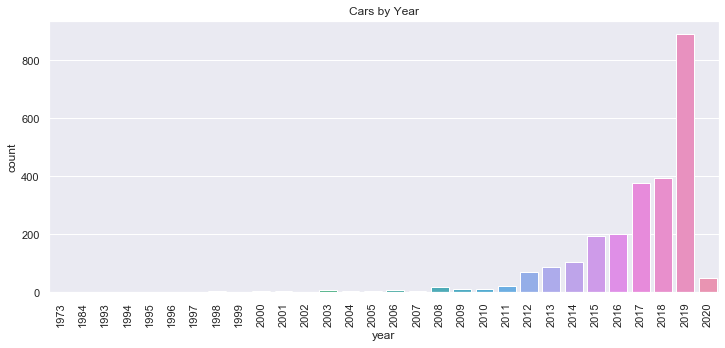

In [9]:
#plot count of years
plt.figure(figsize=(12,5))
sns.countplot("year",data=df)
plt.xticks(rotation=90)
plt.title('Cars by Year')
plt.show()

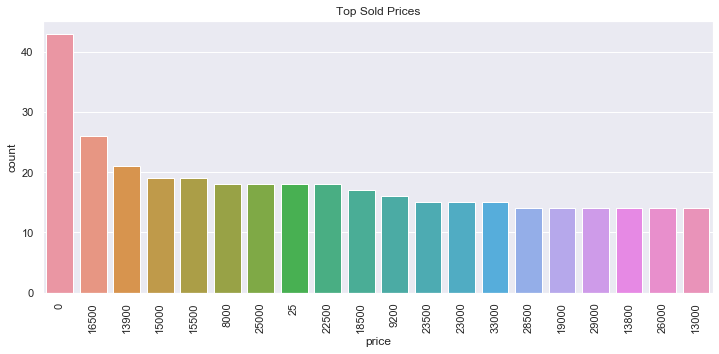

In [11]:
#plot top sold prices
plt.figure(figsize=(12,5))
sns.countplot("price",data=df,order=df.price.value_counts().iloc[:20].index)
plt.xticks(rotation=90)
plt.title('Top Sold Prices')
plt.show()

In [17]:
#median price
df.price.median()

16900.0

In [6]:
#dimensions
df.shape

(2499, 8)

In [13]:
#percent of missing price values
print('Missing Price Values:', (df.price==0).sum()/df.shape[0], '%')

Missing Price Values: 0.01720688275310124 %


In [86]:
#drop missing prices
df = df.drop(df[df.price == 0].index)

In [21]:
#shape after deleting 43 missing prices
df.shape

(2456, 8)

In [22]:
#conditional selection of bmw cars only
df.loc[df.brand=='bmw']

,price,brand,model,year,title_status,mileage,color,state
72,29400,bmw,x3,2017,clean vehicle,23765.0,black,tennessee
92,24500,bmw,door,2017,clean vehicle,17626.0,gray,michigan
95,53500,bmw,m,2017,clean vehicle,29355.0,blue,michigan
162,39000,bmw,series,2016,clean vehicle,39917.0,blue,michigan
165,40000,bmw,series,2016,clean vehicle,31727.0,gray,michigan
171,39000,bmw,series,2016,clean vehicle,33110.0,black,michigan
234,6200,bmw,door,2011,clean vehicle,80394.0,gray,texas
375,2925,bmw,door,2013,salvage insurance,46060.0,white,florida
399,61200,bmw,series,2020,clean vehicle,7509.0,black,california
401,13500,bmw,series,2014,clean vehicle,33542.0,blue,new jersey


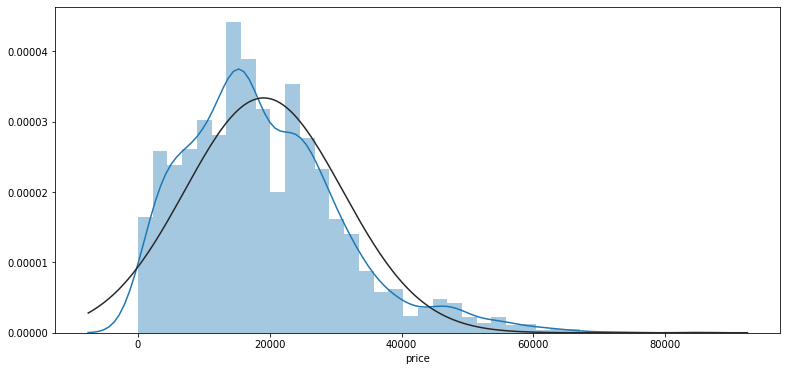

In [24]:
#histogram of price
plt.figure(figsize=(13,6))
sns.distplot(df['price'] , fit=norm);

In [194]:
print("Skew of Price:", df['price'].skew())

Skew of Price: 0.9608201379517298


#### Skewed value is between 0.5 and 1 therefore moderately skewed to the right (positive). Mean > Median.

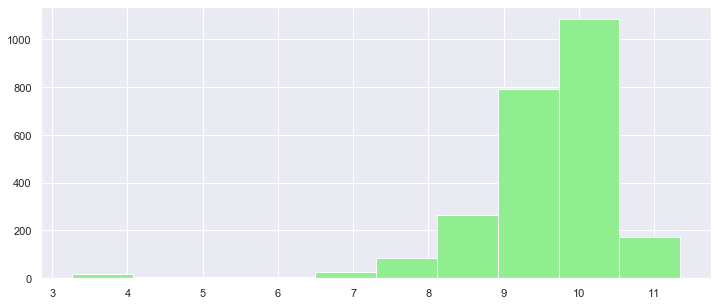

Skew of Log Transformed Price: -2.796663783111647


In [15]:
plt.figure(figsize=(12,5))
logPrice = np.log(df['price']+1)
plt.hist(logPrice,color='lightgreen')
plt.show()
print ("Skew of Log Transformed Price:", logPrice.skew())

In [25]:
df.price.mean()

19096.2585504886

In [16]:
above_ave_price = df[df.price>18768]

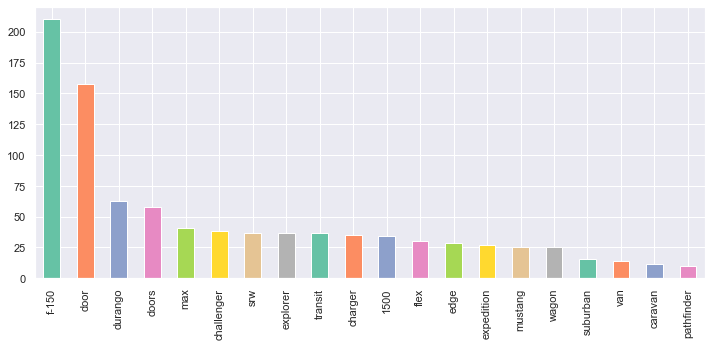

In [17]:
#graph of most common above average priced car models
plt.figure(figsize=(12,5))
above_ave_price.model.value_counts().head(20).plot(kind='bar', color=sns.color_palette("Set2"))

In [18]:
#75th percentile price is 25555
expensive=df[df.price>25555]

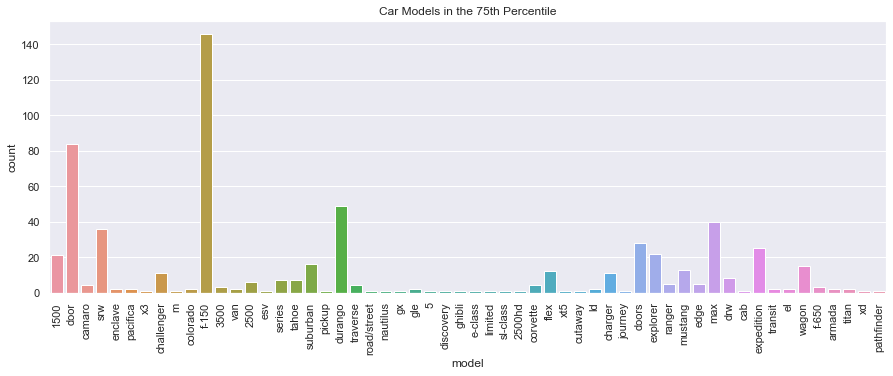

In [19]:
#graph of most common car models in the 75th percentile
plt.figure(figsize=(15,5))
sns.countplot("model",data=expensive)
plt.xticks(rotation=90)
plt.title('Car Models in the 75th Percentile')
plt.show()

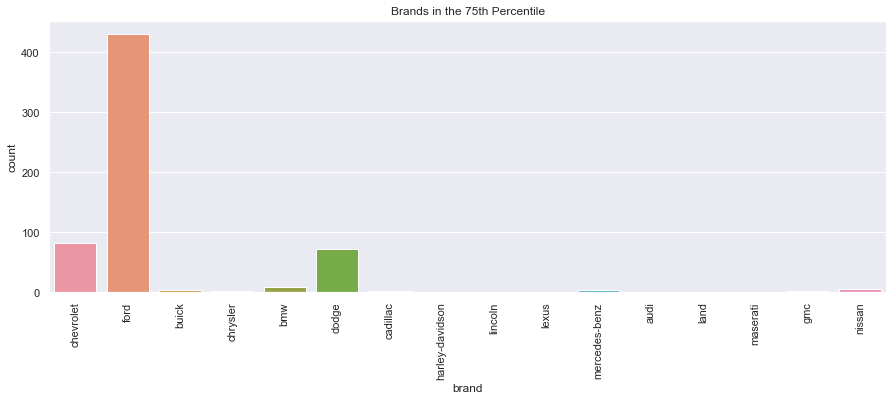

In [20]:
# graph of most common car brands in the 75th percentile
plt.figure(figsize=(15,5))
sns.countplot("brand",data=expensive)
plt.xticks(rotation=90)
plt.title('Brands in the 75th Percentile')
plt.show()

In [31]:
#most expensive car
df.loc[df.price == df.price.max()]

,price,brand,model,year,title_status,mileage,color,state
502,84900,mercedes-benz,sl-class,2017,clean vehicle,25302.0,silver,florida


In [32]:
#title status values
df.title_status.unique()

array(['clean vehicle', 'salvage insurance'], dtype=object)

Text(0, 0.5, 'Count')

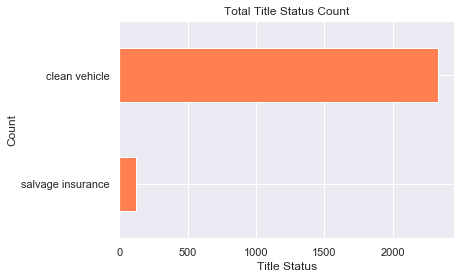

In [21]:
#plot title status count
df.title_status.value_counts().sort_values().plot(kind='barh', color='coral')
plt.title('Total Title Status Count')
plt.xlabel('Title Status')
plt.ylabel('Count')

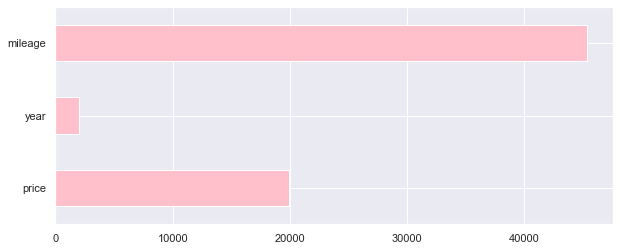

In [22]:
#graph of clean vehicles with average values
df[df.title_status=='clean vehicle'].mean().plot(kind='barh',figsize=(10,4), color='pink')

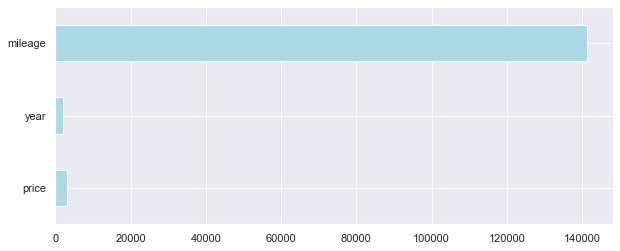

In [23]:
#graph of salvage insurance with average values
df[df.title_status=='salvage insurance'].mean().plot(kind='barh',figsize=(10,4), color='lightblue')

#### Prices are significantly lower in title_status with salvage insurance

In [87]:
# grouping all similar colors under same umbrella
df['color']=df['color'].replace('color:','no_color')
df['color']=df['color'].replace(['light blue','morningsky blue','dark blue','kona blue metallic','lightning blue',
                                'jazz blue pearlcoat'],'blue')
df['color']=df['color'].replace(['ruby red','toreador red','burgundy','royal crimson metallic tinted clearcoat',
                                'ruby red metallic tinted clearcoat','maroon','cayenne red'],'red')
df['color']=df['color'].replace(['phantom black','tuxedo black metallic', 'shadow black','super black',
                                'black clearcoat'] ,'black')
df['color']=df['color'].replace(['ingot silver','ingot silver metallic','billet silver metallic clearcoat'],'silver')
df['color']=df['color'].replace(['glacier white','pearl white','white platinum tri-coat metallic','oxford white',
                                 'bright white clearcoat','off-white'],'white')
df['color']=df['color'].replace(['competition orange'],'orange')
df['color']=df['color'].replace(['triple yellow tri-coat'],'yellow')
df['color']=df['color'].replace(['tan'],'brown')
df['color']=df['color'].replace(['magnetic metallic','guard'],'gray')

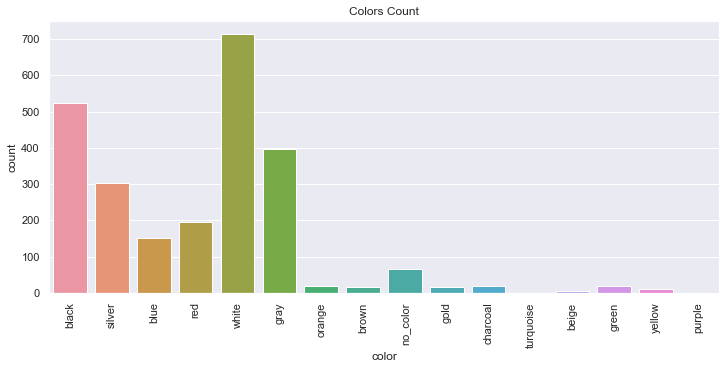

In [26]:
#plot color count
plt.figure(figsize=(12,5))
sns.countplot("color",data=df)
plt.xticks(rotation=90)
plt.title('Colors Count')
plt.show()

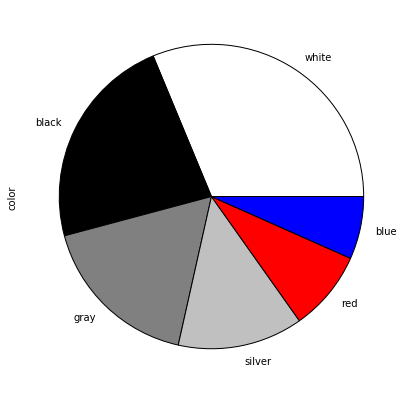

In [36]:
#pie graph of top colors
df.color.value_counts().head(6).plot(kind='pie', colors=df.color.value_counts().head(6).index, figsize=(8,7), 
                    wedgeprops={"edgecolor":"0",'linewidth': 1,
                    'linestyle': 'solid', 'antialiased': True})

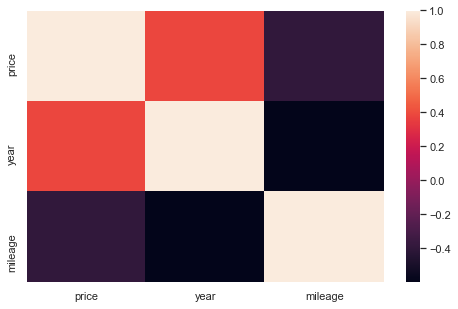

In [27]:
#heatmap
plt.subplots(figsize =(8,5))
sns.heatmap(df.corr())

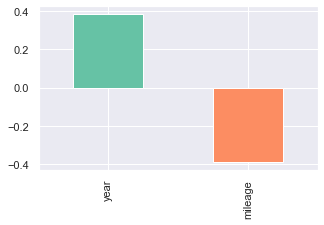

In [44]:
#correlation with price
corr_with_price = df.corr()["price"].sort_values(ascending=False)
plt.figure(figsize=(5,3))
corr_with_price.drop("price").plot(kind='bar',color=sns.color_palette("Set2"))
plt.show();

Text(0, 0.5, 'Price')

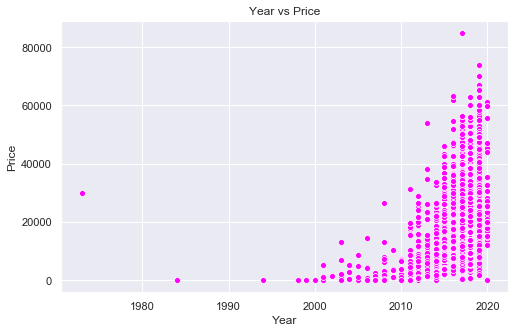

In [29]:
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x="year", y="price", data=df, color='magenta')
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

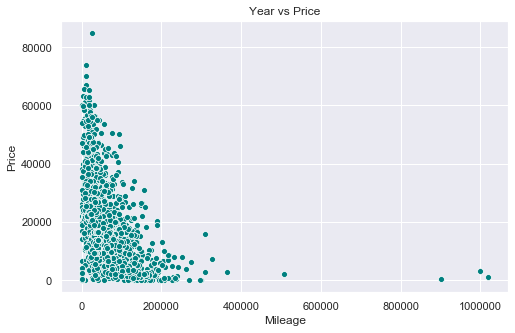

In [30]:
#plotting mileage with price
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x="mileage", y="price", data=df, color="teal")
plt.title("Year vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")

In [11]:
#columns with object datatype
object_cols = [col for col in df.columns if df[col].dtype == "object"]

#number of unique values in each column with categorical data
object_nunique = list(map(lambda col: df[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

#print number of unique entries by column
sorted(d.items(), key=lambda x: x[1])

[('title_status', 2),
 ('color', 16),
 ('brand', 28),
 ('state', 44),
 ('model', 127)]

In [89]:
#convert to dummy variables
dummy_brand = pd.get_dummies(df['brand'])
df=pd.concat([df,dummy_brand],axis=1)
df.drop(['brand'],axis=1,inplace=True)

model_dummy = pd.get_dummies(df['model'])
df=pd.concat([df,model_dummy],axis=1)
df.drop(['model'],axis=1,inplace=True)

title_dummy = pd.get_dummies(df['title_status'])
df=pd.concat([df,title_dummy],axis=1)
df.drop(['title_status'],axis=1,inplace=True)

color_dummy = pd.get_dummies(df['color'])
df=pd.concat([df,color_dummy],axis=1)
df.drop(['color'],axis=1,inplace=True)

state_dummy = pd.get_dummies(df['state'])
df=pd.concat([df,state_dummy],axis=1)
df.drop(['state'],axis=1,inplace=True)

In [91]:
#make sure all columns have number datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456 entries, 0 to 2498
Columns: 218 entries, price to wisconsin
dtypes: float64(1), int64(2), uint8(215)
memory usage: 592.4 KB


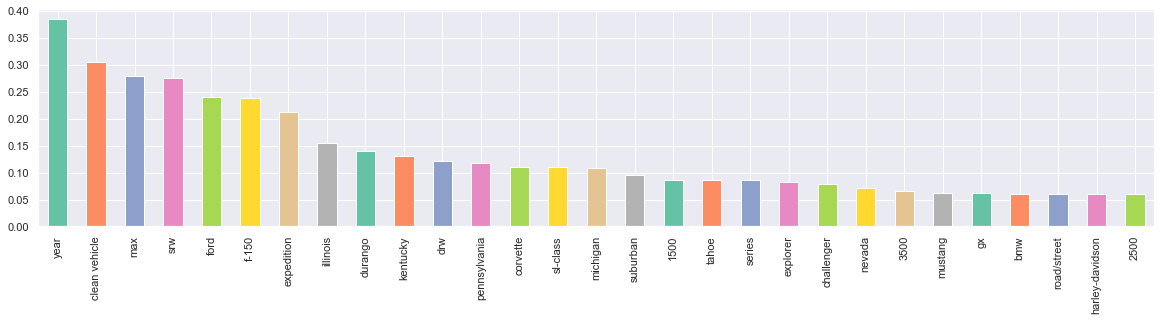

In [36]:
#correlation of features with price
corr_with_price = df.corr()["price"].sort_values(ascending=False).head(30)
plt.figure(figsize=(20,4))
corr_with_price.drop("price").plot(kind='bar',color=sns.color_palette("Set2"))
plt.show();

In [92]:
#import more libraries
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# machine learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [93]:
#train test split
features = df.drop('price',axis=1).values
target = df.price.values
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.20,shuffle=True)

### K-Fold Cross Validation

In [48]:
# Decision Tree
dtree = DecisionTreeRegressor()
print('Decision Tree:',cross_val_score(dtree, features, target))

# Random Forest
rforest= RandomForestRegressor()
print('Random Forest:',cross_val_score(rforest,features, target))

# KNN 
knn= KNeighborsRegressor()
print('KNN:',cross_val_score(knn, features, target))

# XGB Regressor
xgb = XGBRegressor(objective='reg:squarederror')
print('XGBoost:',cross_val_score(xgb, features, target))

Decision Tree: [-0.04131628  0.06845302  0.37990646  0.28684784 -0.10667512]
Random Forest: [0.23093429 0.47780509 0.58594095 0.52243396 0.45086108]
KNN: [ 0.01745793  0.02315385  0.08029813  0.00958238 -0.16248449]
XGBoost: [0.29406818 0.46063837 0.5888018  0.54617161 0.6245692 ]


### XGBRegressor

In [49]:
#using default params
xgb = XGBRegressor(objective='reg:squarederror').fit(X_train, y_train, verbose=False)
y_train_pred_xg = xgb.predict(X_train)
y_pred_xg = xgb.predict(X_test)

print ("Train r2 score:", r2_score(y_pred=y_train_pred_xg,y_true=y_train))
print("Test r2 score:", r2_score(y_test, y_pred_xg))
train_mse = mean_squared_error(y_train_pred_xg, y_train)
test_mse = mean_squared_error(y_pred_xg, y_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print("Train RMSE: %.4f" % train_rmse)
print("Test RMSE: %.4f" % test_rmse)

Train r2 score: 0.6955759248785325
Test r2 score: 0.5712118119766039
Train RMSE: 6553.3588
Test RMSE: 8038.8668


In [50]:
#changing param n_estimators to improve the model
xgb2 = XGBRegressor(objective='reg:squarederror',n_estimators=500).fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred_xg2 = xgb2.predict(X_train)
y_pred_xg2 = xgb2.predict(X_test)

print ("Train r2 score:", r2_score(y_pred=y_train_pred_xg2,y_true=y_train))
print("Test r2 score:", r2_score(y_test, y_pred_xg2))
train_mse2 = mean_squared_error(y_train_pred_xg2, y_train)
test_mse2 = mean_squared_error(y_pred_xg2, y_test)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
print("Train RMSE: %.4f" % train_rmse2)
print("Test RMSE: %.4f" % test_rmse2)

Train r2 score: 0.7907964294087285
Test r2 score: 0.6398210975662534
Train RMSE: 5432.6158
Test RMSE: 7367.7106


### Grid Search

In [94]:
from sklearn.model_selection import GridSearchCV

In [108]:
#tuning max_depth and gamma
param_test1 = {
    'max_depth':[3,5,7],
    'gamma':[i/10.0 for i in range(0,3)]
}

xgb_model = XGBRegressor(objective='reg:squarederror', learning_rate =0.1, n_estimators=500, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1)

grid1 = GridSearchCV(estimator = xgb_model, param_grid = param_test1, n_jobs=6,iid=False, 
                     verbose=10,scoring='r2', refit=True)

grid1.fit(X_train,y_train)
print('best params:',grid1.best_params_)
print('best score:',grid1.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:   21.6s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   34.4s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done  39 out of  45 | elapsed:  3.4min remaining:   31.5s
[Parallel(n_jobs=6)]: Done  45 out of  45 | elapsed:  4.0min finished


best params: {'gamma': 0.0, 'max_depth': 5}
best score: 0.7009145655299226


In [109]:
#tuning min_child_weight and n_estimators
param_test2 = {
    'min_child_weight':range(1,6,2),
    'n_estimators':[50,100,500,1000]
}

xgb_model = XGBRegressor(objective='reg:squarederror', learning_rate =0.1, n_estimators=500, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1)

grid2 = GridSearchCV(estimator = xgb_model, param_grid = param_test2, n_jobs=6, iid=False, 
                     verbose=10, scoring='r2', refit=True)

grid2.fit(X_train,y_train)
print('best params:',grid2.best_params_)
print('best score:',grid2.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   41.7s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   59.0s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done  56 out of  60 | elapsed:  4.3min remaining:   18.5s
[Parallel(n_jobs=6)]: Done  60 out of  60 | elapsed:  4.4min finished


best params: {'min_child_weight': 1, 'n_estimators': 500}
best score: 0.7009145655299226


In [110]:
#tuning learning_rate and colsample_bytree
param_test3 = {
    'learning_rate':[0.1,0.05, 0.01],
    'colsample_bytree':[0.4,0.6,0.8]
}

xgb_model = XGBRegressor(objective='reg:squarederror', learning_rate =0.1, n_estimators=500, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1)

grid3 = GridSearchCV(estimator = xgb_model, param_grid = param_test3, n_jobs=6, iid=False, 
                     verbose=10, scoring='r2', refit=True)

grid3.fit(X_train,y_train)
print('best params:',grid3.best_params_)
print('best score:',grid3.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:   24.1s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   24.4s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done  39 out of  45 | elapsed:  3.3min remaining:   30.4s
[Parallel(n_jobs=6)]: Done  45 out of  45 | elapsed:  3.6min finished


best params: {'colsample_bytree': 0.4, 'learning_rate': 0.1}
best score: 0.706849746084233


In [111]:
#tuning reg_alpha, reg_lambda and subsample
param_test4 = {
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]
}

xgb_model = XGBRegressor(objective='reg:squarederror',learning_rate =0.1, n_estimators=500, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1)

grid4 = GridSearchCV(estimator = xgb_model, param_grid = param_test4, n_jobs=6, iid=False, 
                     verbose=10, scoring='r2', refit=True)

grid4.fit(X_train,y_train)
print('best params:',grid4.best_params_)
print('best score:',grid4.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:   30.3s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   30.8s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:  4.6min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:  5.3min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed:  7.2min
[Parallel(n_jobs=6)]: Done  90 out of  90 | elapsed:  8.3min finished


best params: {'reg_alpha': 1e-05, 'reg_lambda': 0.01, 'subsample': 0.95}
best score: 0.7110829287354496


In [95]:
#fine tuning reg_lambda 
param_test4b = {
    'reg_lambda':[1e-2, 0.1, 0.3]
}

xgb_model = XGBRegressor(objective='reg:squarederror',learning_rate =0.1, n_estimators=500, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1)

grid4b = GridSearchCV(estimator = xgb_model, param_grid = param_test4b, n_jobs=6, iid=False, 
                     verbose=10, scoring='r2', refit=True)

grid4b.fit(X_train,y_train)
print('best params:',grid4b.best_params_)
print('best score:',grid4b.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:   33.7s
[Parallel(n_jobs=6)]: Done   6 out of  15 | elapsed:   34.5s remaining:   51.7s
[Parallel(n_jobs=6)]: Done   8 out of  15 | elapsed:  1.1min remaining:   55.7s
[Parallel(n_jobs=6)]: Done  10 out of  15 | elapsed:  1.1min remaining:   32.0s
[Parallel(n_jobs=6)]: Done  12 out of  15 | elapsed:  1.1min remaining:   16.1s
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:  1.4min finished


best params: {'reg_lambda': 0.01}
best score: 0.7213685243149421


In [32]:
#using all the best params from gridsearch
xgb3 = XGBRegressor(objective='reg:squarederror',learning_rate=0.1, n_estimators=500, max_depth=5,
        min_child_weight=1, gamma=0, subsample=0.95, colsample_bytree=0.4, 
        reg_alpha=1e-05, reg_lambda=0.01).fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred_xg3 = xgb3.predict(X_train)
y_pred_xg3 = xgb3.predict(X_test)

print ("Train r2 score:", r2_score(y_pred=y_train_pred_xg3,y_true=y_train))
print("Test r2 score:", r2_score(y_test, y_pred_xg3))
train_mse3 = mean_squared_error(y_train_pred_xg3, y_train)
test_mse3 = mean_squared_error(y_pred_xg3, y_test)
train_rmse3 = np.sqrt(train_mse3)
test_rmse3 = np.sqrt(test_mse3)
print("Train RMSE: %.4f" % train_rmse3)
print("Test RMSE: %.4f" % test_rmse3)

Train r2 score: 0.859761349082788
Test r2 score: 0.6462100848122783
Train RMSE: 4528.4336
Test RMSE: 6787.6422


In [62]:
#predict car prices
prediction = xgb3.predict(X_test)
test=pd.DataFrame({"true price":(y_test),"predicted price":(prediction)})
print(test.head(5))

   true price  predicted price
0       16500     18584.605469
1       13600     16152.747070
2       10330     13512.653320
3       18000     13845.378906
4       24000     26632.314453


In [34]:
#eval metric
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb3.fit(X_train, y_train, eval_metric='rmse', eval_set=eval_set)

[0]	validation_0-rmse:20703.4	validation_1-rmse:20577.2
[1]	validation_0-rmse:19139.3	validation_1-rmse:18964.1
[2]	validation_0-rmse:17673.3	validation_1-rmse:17534.7
[3]	validation_0-rmse:16377.9	validation_1-rmse:16249.1
[4]	validation_0-rmse:15318.3	validation_1-rmse:15153.3
[5]	validation_0-rmse:14297.1	validation_1-rmse:14114.3
[6]	validation_0-rmse:13385.7	validation_1-rmse:13235.7
[7]	validation_0-rmse:12580.8	validation_1-rmse:12484.5
[8]	validation_0-rmse:11860.5	validation_1-rmse:11859.9
[9]	validation_0-rmse:11300.9	validation_1-rmse:11316.3
[10]	validation_0-rmse:10771.8	validation_1-rmse:10866.3
[11]	validation_0-rmse:10337	validation_1-rmse:10433
[12]	validation_0-rmse:9949.5	validation_1-rmse:10103.7
[13]	validation_0-rmse:9572.81	validation_1-rmse:9804.34
[14]	validation_0-rmse:9261.87	validation_1-rmse:9500.14
[15]	validation_0-rmse:9032.45	validation_1-rmse:9296.66
[16]	validation_0-rmse:8782.66	validation_1-rmse:9090.89
[17]	validation_0-rmse:8542.11	validation_1-rm

[144]	validation_0-rmse:4916.94	validation_1-rmse:6910.79
[145]	validation_0-rmse:4903.56	validation_1-rmse:6913.45
[146]	validation_0-rmse:4882.13	validation_1-rmse:6892.06
[147]	validation_0-rmse:4873.54	validation_1-rmse:6890.75
[148]	validation_0-rmse:4867.08	validation_1-rmse:6889.49
[149]	validation_0-rmse:4855.5	validation_1-rmse:6885.08
[150]	validation_0-rmse:4838.06	validation_1-rmse:6882.67
[151]	validation_0-rmse:4832.93	validation_1-rmse:6880.02
[152]	validation_0-rmse:4823.86	validation_1-rmse:6875.73
[153]	validation_0-rmse:4815.98	validation_1-rmse:6876.51
[154]	validation_0-rmse:4809.12	validation_1-rmse:6871.49
[155]	validation_0-rmse:4793.89	validation_1-rmse:6875.96
[156]	validation_0-rmse:4787.46	validation_1-rmse:6869.84
[157]	validation_0-rmse:4780.75	validation_1-rmse:6865.1
[158]	validation_0-rmse:4772.43	validation_1-rmse:6865.68
[159]	validation_0-rmse:4766.34	validation_1-rmse:6867.83
[160]	validation_0-rmse:4708.81	validation_1-rmse:6855.61
[161]	validation

[286]	validation_0-rmse:3811.89	validation_1-rmse:6709.96
[287]	validation_0-rmse:3810.16	validation_1-rmse:6710.96
[288]	validation_0-rmse:3809.18	validation_1-rmse:6709.3
[289]	validation_0-rmse:3806.44	validation_1-rmse:6708.58
[290]	validation_0-rmse:3805.4	validation_1-rmse:6709.93
[291]	validation_0-rmse:3800.39	validation_1-rmse:6719.16
[292]	validation_0-rmse:3798.66	validation_1-rmse:6718.38
[293]	validation_0-rmse:3797.6	validation_1-rmse:6716.7
[294]	validation_0-rmse:3794.39	validation_1-rmse:6712.11
[295]	validation_0-rmse:3792.33	validation_1-rmse:6711.69
[296]	validation_0-rmse:3780.44	validation_1-rmse:6711.07
[297]	validation_0-rmse:3770.56	validation_1-rmse:6711.79
[298]	validation_0-rmse:3765.61	validation_1-rmse:6715.48
[299]	validation_0-rmse:3760.77	validation_1-rmse:6716.08
[300]	validation_0-rmse:3756.81	validation_1-rmse:6718.4
[301]	validation_0-rmse:3753.35	validation_1-rmse:6720.69
[302]	validation_0-rmse:3740.97	validation_1-rmse:6719.66
[303]	validation_0-

[429]	validation_0-rmse:3084.12	validation_1-rmse:6712.44
[430]	validation_0-rmse:3074.21	validation_1-rmse:6712.29
[431]	validation_0-rmse:3070.55	validation_1-rmse:6711.61
[432]	validation_0-rmse:3063.79	validation_1-rmse:6713.58
[433]	validation_0-rmse:3055.12	validation_1-rmse:6716.62
[434]	validation_0-rmse:3054.57	validation_1-rmse:6715.94
[435]	validation_0-rmse:3053.02	validation_1-rmse:6718.53
[436]	validation_0-rmse:3034.14	validation_1-rmse:6718.73
[437]	validation_0-rmse:3033.81	validation_1-rmse:6718.54
[438]	validation_0-rmse:3033.42	validation_1-rmse:6718.57
[439]	validation_0-rmse:3032.56	validation_1-rmse:6718.74
[440]	validation_0-rmse:3031.89	validation_1-rmse:6718.84
[441]	validation_0-rmse:3021.34	validation_1-rmse:6722.74
[442]	validation_0-rmse:3015.48	validation_1-rmse:6715.11
[443]	validation_0-rmse:3015.08	validation_1-rmse:6714.69
[444]	validation_0-rmse:3014.15	validation_1-rmse:6714.66
[445]	validation_0-rmse:3013.11	validation_1-rmse:6714.81
[446]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=470,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=1e-05, reg_lambda=0.01,
             scale_pos_weight=1, seed=None, silent=None, subsample=0.95,
             verbosity=1)

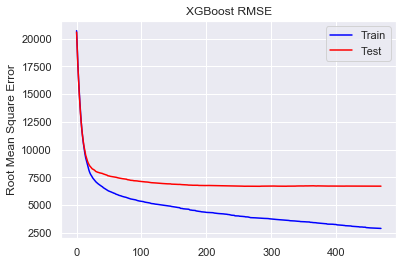

In [36]:
# compare RMSE for training and test set
results = xgb3.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train', color='blue')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test', color='red')
ax.legend()
plt.ylabel('Root Mean Square Error')
plt.title('XGBoost RMSE')
plt.show()